<a href="https://colab.research.google.com/github/usshaa/BK_BIRLA_DL/blob/main/03_DL/Model_behavior_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Model Behavior in Deep Learning**

### Learning Goals:

1. Understand **Underfitting** and **Overfitting**
2. Fix overfitting using:

   * **Dropout**
   * **EarlyStopping**
   * **Batch Normalization**



We'll use a **Sequential ANN** with the **Breast Cancer dataset** and:

* Vary architecture/epochs to demonstrate **underfitting vs overfitting**
* Then apply **regularization techniques**


### Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

### Step 1: Load and Preprocess Dataset

In [4]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 2: UNDERFITTING

In [7]:
model_underfit = Sequential()
model_underfit.add(Dense(4, input_shape=(X_train.shape[1],), activation='relu'))
model_underfit.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model_underfit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history_underfit = model_underfit.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
model_underfit.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9867 - loss: 0.0606 - val_accuracy: 0.9649 - val_loss: 0.0832
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9895 - loss: 0.0601 - val_accuracy: 0.9649 - val_loss: 0.0829
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9716 - loss: 0.0717 - val_accuracy: 0.9649 - val_loss: 0.0820
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9839 - loss: 0.0583 - val_accuracy: 0.9649 - val_loss: 0.0817
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9791 - loss: 0.0707 - val_accuracy: 0.9649 - val_loss: 0.0807
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9698 - loss: 0.0881 - val_accuracy: 0.9649 - val_loss: 0.0800
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9825 - loss: 0.0680 - val_accuracy: 0.9649 - val_loss: 0.0796
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9796 - loss: 0.0648 - val_accuracy: 0.9649 - val_lo

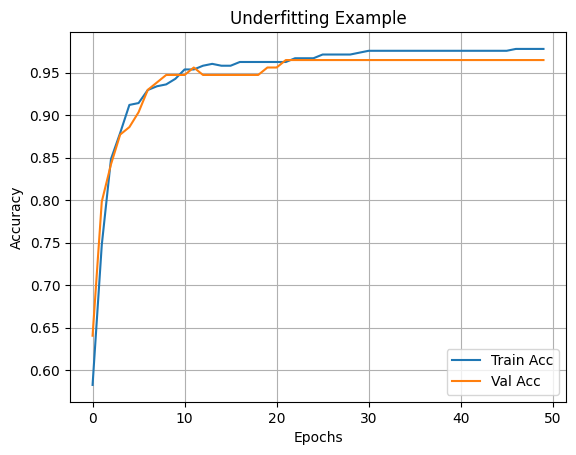

In [10]:
# Plot
plt.plot(history_underfit.history['accuracy'], label='Train Acc')
plt.plot(history_underfit.history['val_accuracy'], label='Val Acc')
plt.title("Underfitting Example")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 3: OVERFITTING

In [11]:
model_overfit = Sequential()
model_overfit.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_overfit.add(Dense(64, activation='relu'))
model_overfit.add(Dense(32, activation='relu'))
model_overfit.add(Dense(1, activation='sigmoid'))

In [12]:
model_overfit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history_overfit = model_overfit.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)
model_overfit.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 9.1525e-06 - val_accuracy: 0.9737 - val_loss: 0.2120
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 6.9749e-06 - val_accuracy: 0.9737 - val_loss: 0.2124
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 6.2086e-06 - val_accuracy: 0.9737 - val_loss: 0.2125
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 6.5069e-06 - val_accuracy: 0.9737 - val_loss: 0.2128
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 4.8616e-06 - val_accuracy: 0.9737 - val_loss: 0.2131
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 7.2744e-06 - val_accuracy: 0.9737 - val_loss: 0.2134
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 7.1064e-06 - val_accuracy: 0.9737 - val_loss: 0.2139
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 5.47

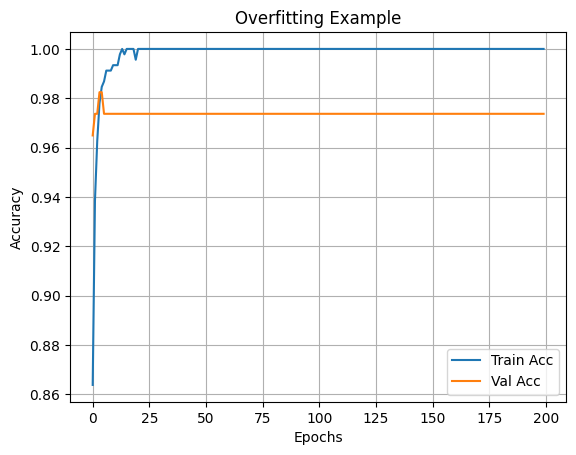

In [14]:
# Plot
plt.plot(history_overfit.history['accuracy'], label='Train Acc')
plt.plot(history_overfit.history['val_accuracy'], label='Val Acc')
plt.title("Overfitting Example")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 4: APPLY **DROPOUT** to fix Overfitting

   * **Dropout**

      <img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif">

```
What is Dropout doing?
Dropout(0.3) means 30% of neurons are randomly disabled during each training step.
This prevents over-reliance on specific neurons, encouraging the network to learn more robust patterns.
It helps reduce overfitting by simulating a kind of model ensemble during training.
```

In [15]:
model_dropout = Sequential()
model_dropout.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dense(1, activation='sigmoid'))

In [16]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
model_dropout.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 2.3828e-04 - val_accuracy: 0.9737 - val_loss: 0.2124
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9737 - val_loss: 0.2178
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 9.1614e-04 - val_accuracy: 0.9737 - val_loss: 0.2191
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 4.5971e-04 - val_accuracy: 0.9737 - val_loss: 0.2208
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 1.2816e-04 - val_accuracy: 0.9737 - val_loss: 0.2216
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 2.9850e-04 - val_accuracy: 0.9737 - val_loss: 0.2225
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 1.8117e-04 - val_accuracy: 0.9737 - val_loss: 0.2230
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 5.312

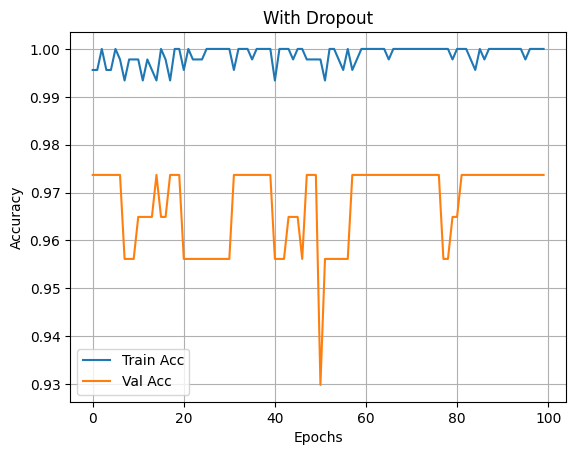

In [19]:
# Plot
plt.plot(history_dropout.history['accuracy'], label='Train Acc')
plt.plot(history_dropout.history['val_accuracy'], label='Val Acc')
plt.title("With Dropout")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 5: APPLY **EarlyStopping** to prevent overfitting
   * **EarlyStopping**

      <img src="https://media.licdn.com/dms/image/v2/D4E12AQEDd77yYwKdXQ/article-inline_image-shrink_1000_1488/article-inline_image-shrink_1000_1488/0/1683057883262?e=1758153600&v=beta&t=9pVAyYEm9JVFeP2RWEAJ_BmDw4SdD91Acmdrw5ciQ_8">

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [21]:
model_earlystop = Sequential()
model_earlystop.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_earlystop.add(Dense(64, activation='relu'))
model_earlystop.add(Dense(32, activation='relu'))
model_earlystop.add(Dense(1, activation='sigmoid'))

In [22]:
model_earlystop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history_earlystop = model_earlystop.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=0
)
model_earlystop.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.9649 - val_loss: 0.0622
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9918 - loss: 0.0336 - val_accuracy: 0.9649 - val_loss: 0.0625
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9956 - loss: 0.0247 - val_accuracy: 0.9737 - val_loss: 0.0624
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9962 - loss: 0.0184 - val_accuracy: 0.9649 - val_loss: 0.0721
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9949 - loss: 0.0198 - val_accuracy: 0.9737 - val_loss: 0.0677
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9946 - loss: 0.0186 - val_accuracy: 0.9737 - val_loss: 0.0708
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9956 - loss: 0.0119 - val_accuracy: 0.9737 - val_loss: 0.0693
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9893 - loss: 0.0180 - val_accuracy: 0.9

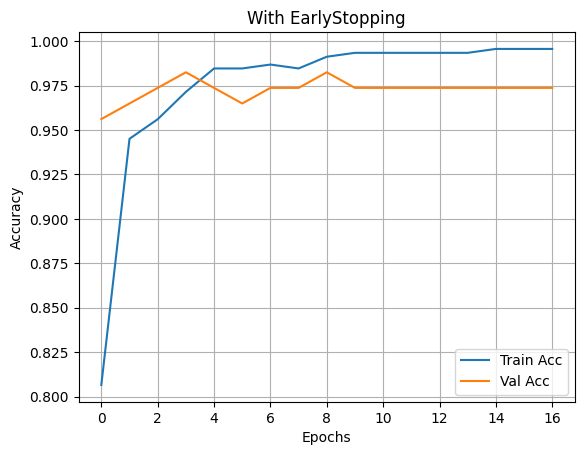

In [24]:
# Plot
plt.plot(history_earlystop.history['accuracy'], label='Train Acc')
plt.plot(history_earlystop.history['val_accuracy'], label='Val Acc')
plt.title("With EarlyStopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Step 6: APPLY **BatchNormalization**
   * **Batch Normalization**
   
      <img src="https://miro.medium.com/v2/resize:fit:1400/1*LM8F_5Tg3mw46FpHFoOnHQ.png">

| 🔍 Feature                       | ✅ Benefit                                |
| -------------------------------- | ---------------------------------------- |
| Normalizes activations           | Makes learning smoother                  |
| Reduces internal covariate shift | Speeds up convergence                    |
| Allows higher learning rates     | Training becomes faster                  |
| Adds slight regularization       | Can reduce need for dropout (not always) |


In [25]:
model_batchnorm = Sequential()
model_batchnorm.add(Dense(128, input_shape=(X_train.shape[1],)))
model_batchnorm.add(BatchNormalization())
model_batchnorm.add(Dense(64, activation='relu'))
model_batchnorm.add(BatchNormalization())
model_batchnorm.add(Dense(32, activation='relu'))
model_batchnorm.add(Dense(1, activation='sigmoid'))

In [26]:
model_batchnorm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_batchnorm = model_batchnorm.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
model_batchnorm.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9829 - loss: 0.0406 - val_accuracy: 0.9649 - val_loss: 0.1166
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.9649 - val_loss: 0.1206
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9649 - val_loss: 0.1134
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9931 - loss: 0.0256 - val_accuracy: 0.9737 - val_loss: 0.1056
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9649 - val_loss: 0.1314
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9976 - loss: 0.0128 - val_accuracy: 0.9649 - val_loss: 0.1264
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9979 - loss: 0.0170 - val_accuracy: 0.9474 - val_loss: 0.1420
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9941 - loss: 0.0260 - val_accuracy: 0.9649 

In [ ]:
# Plot
plt.plot(history_batchnorm.history['accuracy'], label='Train Acc')
plt.plot(history_batchnorm.history['val_accuracy'], label='Val Acc')
plt.title("With Batch Normalization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

```
When to use BatchNorm?
Model is deep and gradients become unstable.
Training on large-scale datasets.
To reduce the need for Dropout.
To speed up training by using higher learning rates.
```

## Final Summary

In [ ]:
from tabulate import tabulate

In [ ]:
results = [
    ["Underfit Model", max(history_underfit.history['val_accuracy'])],
    ["Overfit Model", max(history_overfit.history['val_accuracy'])],
    ["With Dropout", max(history_dropout.history['val_accuracy'])],
    ["With EarlyStopping", max(history_earlystop.history['val_accuracy'])],
    ["With BatchNormalization", max(history_batchnorm.history['val_accuracy'])]
]

In [ ]:
print(tabulate(results, headers=["Model", "Best Validation Accuracy"], tablefmt="fancy_grid"))

╒═════════════════════════╤════════════════════════════╕
│ Model                   │   Best Validation Accuracy │
╞═════════════════════════╪════════════════════════════╡
│ Underfit Model          │                   0.973684 │
├─────────────────────────┼────────────────────────────┤
│ Overfit Model           │                   0.973684 │
├─────────────────────────┼────────────────────────────┤
│ With Dropout            │                   0.982456 │
├─────────────────────────┼────────────────────────────┤
│ With EarlyStopping      │                   0.973684 │
├─────────────────────────┼────────────────────────────┤
│ With BatchNormalization │                   0.982456 │
╘═════════════════════════╧════════════════════════════╛
